In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import cv2
from glob import glob
import seaborn as sns
sns.set()

import sklearn
import skimage
from skimage.transform import resize

import random
from skimage.color import rgb2gray
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [2]:
X_train = np.load("../xtrain.npy")
y_train = np.load("../ytrain.npy")
X_test = np.load("../xtest.npy")
y_test = np.load("../ytest.npy")

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1832, 128, 128, 3)
(68, 128, 128, 3)
(1832,)
(68,)


In [4]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
# Normalization
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)

In [6]:
print(X_train.shape)
print(X_test.shape)

(1832, 49152)
(68, 49152)


In [7]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

C:\Users\Sree Vignesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=2)

In [8]:
def retrieve_info(cluster_labels,y_train):
    # Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [9]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.7647379912663755


In [29]:
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_train)

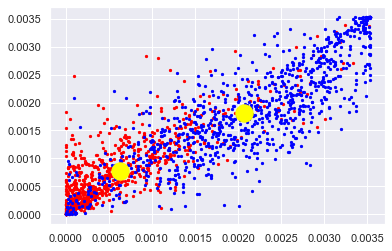

In [30]:
plt.scatter(X_train[y_kmeans==0, 0], X_train[y_kmeans==0, 1], s=5, c='red', label ='Cluster 1')
plt.scatter(X_train[y_kmeans==1, 0], X_train[y_kmeans==1, 1], s=5, c='blue', label ='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

In [25]:
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_test)

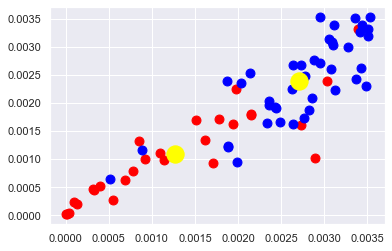

In [28]:
plt.scatter(X_test[y_kmeans==0, 0],X_test[y_kmeans==0, 1], s=80, c='red', label ='Cluster 1')
plt.scatter(X_test[y_kmeans==1, 0],X_test[y_kmeans==1, 1], s=80, c='blue', label ='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')